In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Se va a usar un dia por semana para sujeto normal y enfermo

# nf031 = pd.read_parquet("parquets/no_wind/NF031/NF031_20120102.parquet")
# nf038 = pd.read_parquet("parquets/no_wind/NF038/NF038_20120101.parquet")
# nf134 = pd.read_parquet("parquets/no_wind/NF134/NF134_20150101.parquet")
# pf031w1 = pd.read_parquet("parquets/no_wind/PF031/PF031_20120101.parquet")
# pf031w2 = pd.read_parquet("parquets/no_wind/PF031/PF031_20120602.parquet")
# pf038w1 = pd.read_parquet("parquets/no_wind/PF038/PF038_20120101.parquet")
# pf038w2 = pd.read_parquet("parquets/no_wind/PF038/PF038_20120603.parquet")
# pf134w1 = pd.read_parquet("parquets/no_wind/PF134/PF134_20140101.parquet")
# pf134w2 = pd.read_parquet("parquets/no_wind/PF134/PF134_20140719.parquet")

df = pd.read_parquet("parquets/no_wind/all_data_imputed.parquet")
features = ['level','H1H2all','zcrall','normpeakall','spectralTiltall','LHratioall',
            'periodicity','cppall','acflow','oq','naq','h1h2','mfdr']
df_concat = df[features]
print("🔍 NaNs por columna:")
print(df_concat[features].isna().sum())


🔍 NaNs por columna:
level              0
H1H2all            0
zcrall             0
normpeakall        0
spectralTiltall    0
LHratioall         0
periodicity        0
cppall             0
acflow             0
oq                 0
naq                0
h1h2               0
mfdr               0
dtype: int64


In [ ]:
# Matriz de correlación
corr_matrix = df_concat.corr()
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Varianza explicada por cada componente: [0.27085194 0.22669479 0.09197505 0.08171574 0.07845842]
Varianza total explicada (primeras 5): [0.27085194 0.49754673 0.58952178 0.67123753 0.74969595]


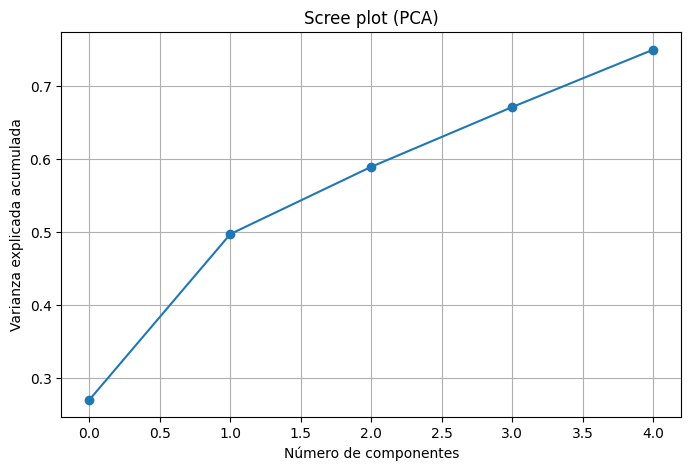

Cargas de las features en las componentes principales:


,PC1,PC2,PC3,PC4,PC5
level,-0.356607,0.341473,-0.000824,0.000288,-0.143593
H1H2all,0.410698,0.244861,-0.000032,-0.080405,-0.203801
zcrall,-0.297086,0.081567,0.446892,0.121451,0.073859
normpeakall,0.078907,0.264765,0.076941,0.512350,-0.256747
spectralTiltall,0.167719,0.363754,0.514986,-0.037751,-0.068226
LHratioall,0.184728,-0.086564,-0.488662,0.184975,-0.505571
periodicity,0.001046,0.059419,-0.104300,0.778409,0.275707
cppall,-0.392023,-0.019126,-0.028555,0.167986,0.024487
acflow,-0.324327,0.366770,-0.282186,-0.158133,-0.140071
oq,0.092334,0.295261,-0.260843,-0.054034,0.605636


In [4]:
#eliminar features con correlacion alta
# df_concat = df_concat.drop(['H1H2all', 'level', 'dBcms2', 'mfdr', 'oq', 'naq', 'freq', 'cppall'], axis=1)  # eliminar features con alta correlación
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_concat)

# PCA
pca = PCA(n_components=5)  # podés cambiar el número
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
explained_var = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_var)
print("Varianza total explicada (primeras 5):", explained_var.cumsum())

# Scree plot (gráfico elbow)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Scree plot (PCA)')
plt.grid(True)
plt.show()

# Cargas (influencia de cada feature en cada componente)
loadings = pd.DataFrame(pca.components_.T, index=features, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Cargas de las features en las componentes principales:")
display(loadings)

C:\Users\gdiaz\AppData\Local\Temp\ipykernel_12836\657891170.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_concat['cppall'], orient="h", palette="Set2")


Text(0.5, 1.0, 'Boxplot de las features')

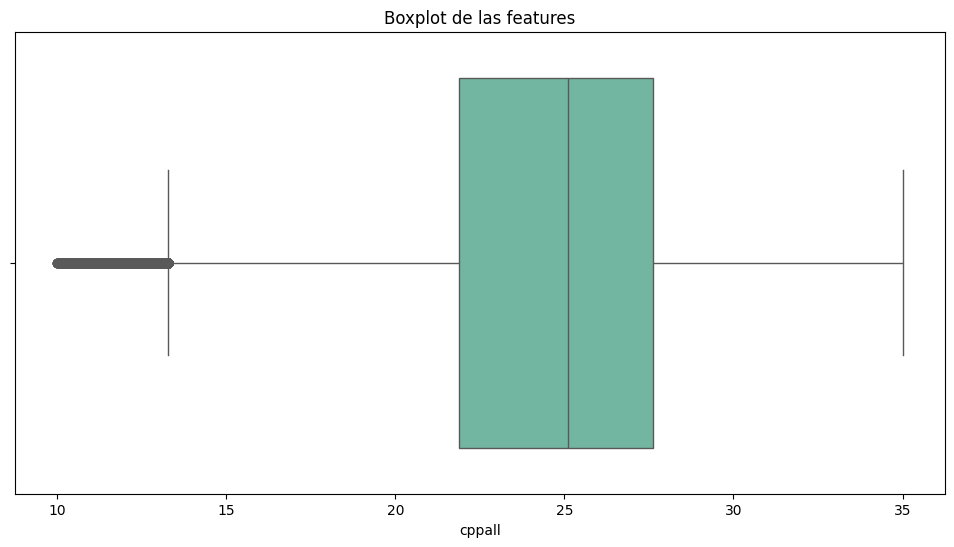

In [12]:
#Hhacer boxplot por feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_concat['cppall'], orient="h", palette="Set2")
plt.title('Boxplot de las features')

Text(0.5, 1.0, 'Distribución de spectralTiltall por tipo de paciente')

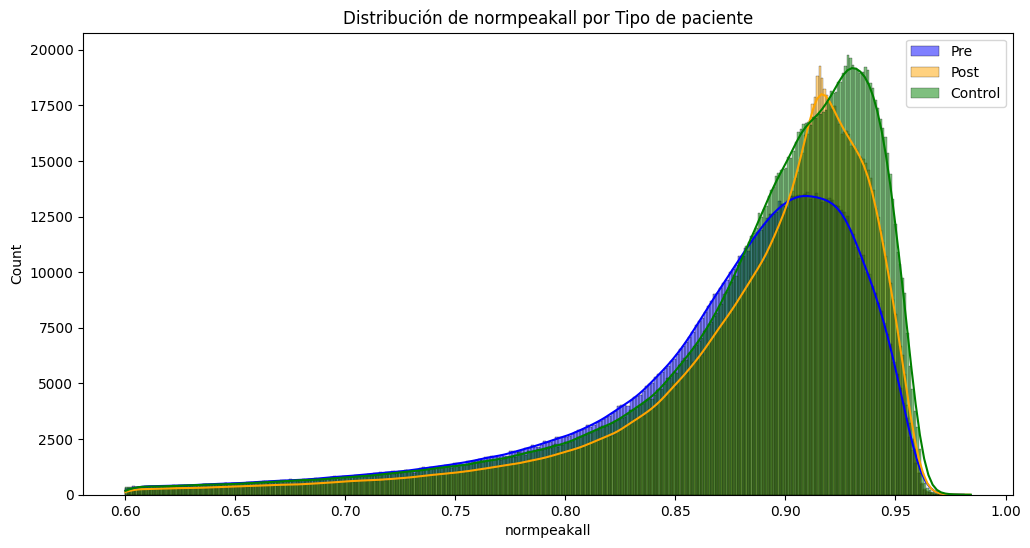

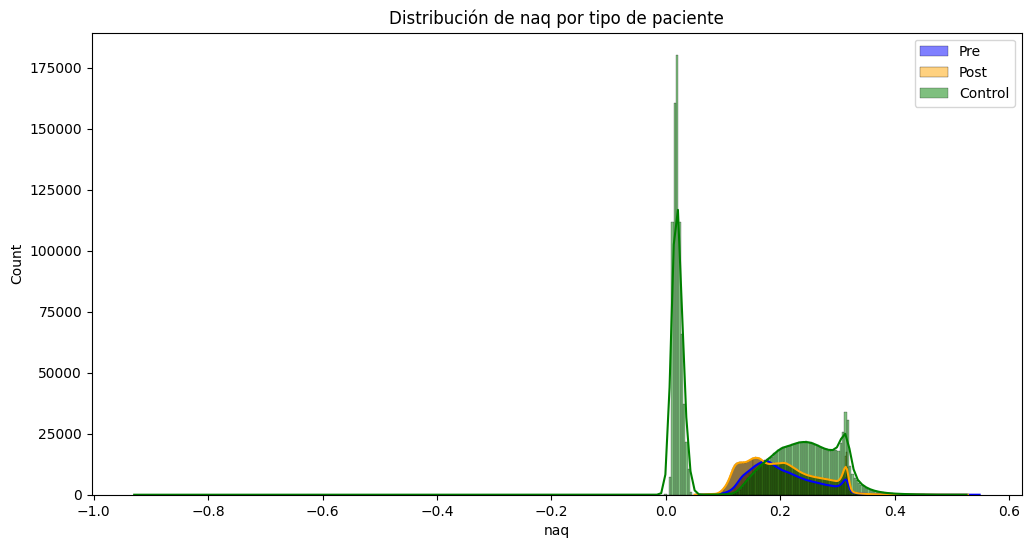

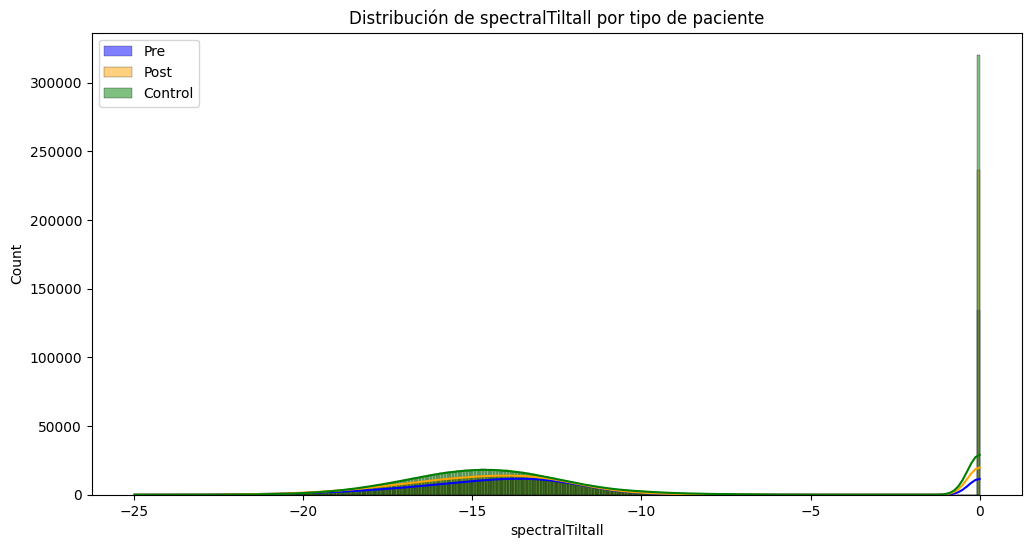

In [11]:
df_pre = df[df['week'] == 'Pre']
df_post = df[df['week'] == 'Post']
df_control = df[df['week'] == 'Control']

#histograma de las features

plt.figure(figsize=(12, 6))
sns.histplot(data=df_pre, x='normpeakall', kde=True, color='blue', label='Pre', alpha=0.5)
sns.histplot(data=df_post, x='normpeakall', kde=True, color='orange', label='Post', alpha=0.5)
sns.histplot(data=df_control, x='normpeakall', kde=True, color='green', label='Control', alpha=0.5)
plt.legend()
plt.title('Distribución de normpeakall por Tipo de paciente')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_pre, x='naq', kde=True, color='blue', label='Pre', alpha=0.5)
sns.histplot(data=df_post, x='naq', kde=True, color='orange', label='Post', alpha=0.5)
sns.histplot(data=df_control, x='naq', kde=True, color='green', label='Control', alpha=0.5)
plt.legend()
plt.title('Distribución de naq por tipo de paciente')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_pre, x='spectralTiltall', kde=True, color='blue', label='Pre', alpha=0.5)
sns.histplot(data=df_post, x='spectralTiltall', kde=True, color='orange', label='Post', alpha=0.5)
sns.histplot(data=df_control, x='spectralTiltall', kde=True, color='green', label='Control', alpha=0.5)
plt.legend()
plt.title('Distribución de spectralTiltall por tipo de paciente')